In [4]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

In [5]:
#load dataset

telco_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
telco_data.shape

(7043, 21)

In [7]:
telco_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [8]:
telco_data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
telco_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
telco_data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [11]:
100*telco_data['Churn'].value_counts()/len(telco_data['Churn'])

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

In [12]:
telco_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64



*   We have no missing data
*   We can use linear regression or fill mean values if there is little amount of data missing.
* A rule of thumb is that if more than 30-40 % data is missing than it is better to drop the data. But care has to be taken as for eg, data like Is_Car & Car_Type can have NaN(null) values for people who don't have car but still it is useful information. 





## **Data Cleaning**

In [13]:
telco_d = telco_data.copy()

In [14]:
#converting total charges into numerical data type
telco_d.TotalCharges = pd.to_numeric(telco_d.TotalCharges,errors='coerce')
telco_d.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [15]:
telco_d.loc[telco_d['TotalCharges'].isnull() == True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [16]:
#dropping missing value rows
telco_d.dropna(how = 'any', inplace = True)



*   Now let's divide the customers into groups based on tenure i.e. one group for 1-2 years, 2nd group for 2-3 years and so on.


In [17]:
#max tenure
print(telco_d['tenure'].max())

72


In [18]:
# Create a list of labels
labels = [f"{i} - {i+11}" for i in range(1, 72, 12)]

# Create a new column 'tenure_group' in the 'telco_data' DataFrame
# by binning the 'tenure' column into groups defined by the range
# 1-80 with intervals of 12, using the labels defined above
telco_d['tenure_group'] = pd.cut(telco_d['tenure'], bins=range(1, 81, 12), right=False, labels=labels)
telco_d['tenure_group'].value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
25 - 36     832
49 - 60     832
37 - 48     762
Name: tenure_group, dtype: int64



*   Remove columns which are not required.



In [19]:
#drop column customerID and tenure
telco_d.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
telco_d.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1 - 12


## Exploratory data analysis



*   Let's plot each predictor's distribution by churn.

## Univariate Analysis


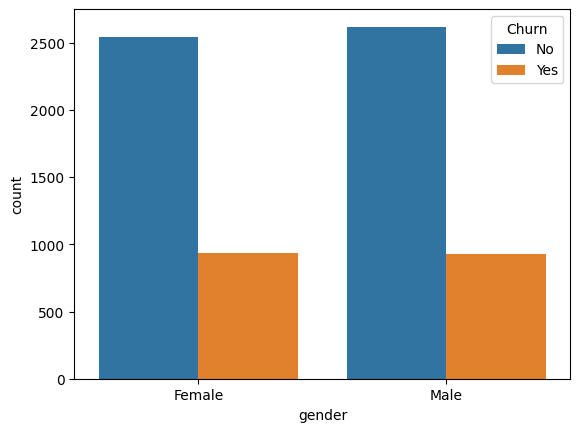

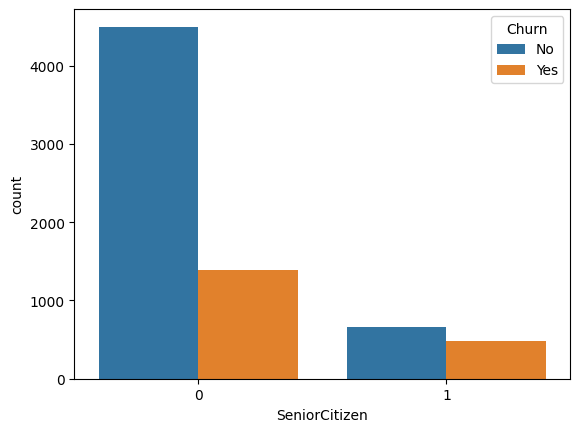

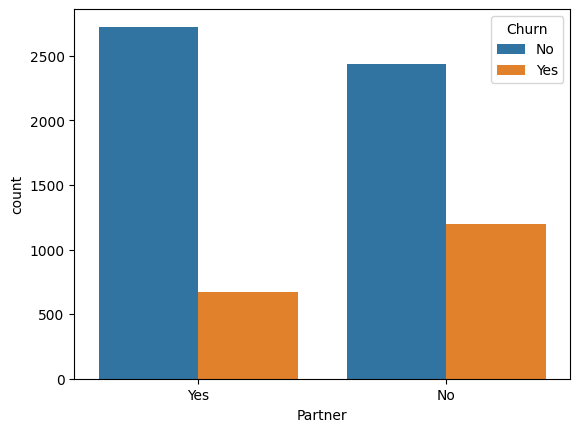

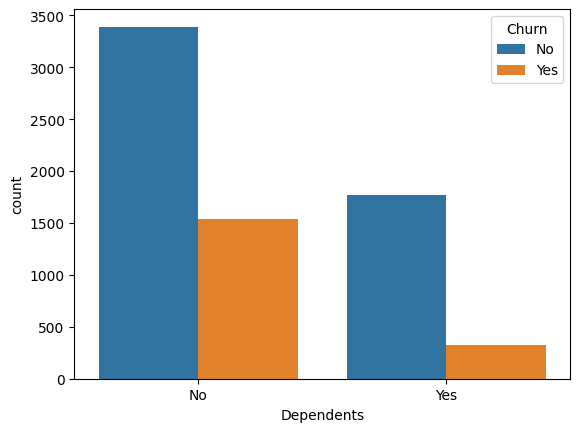

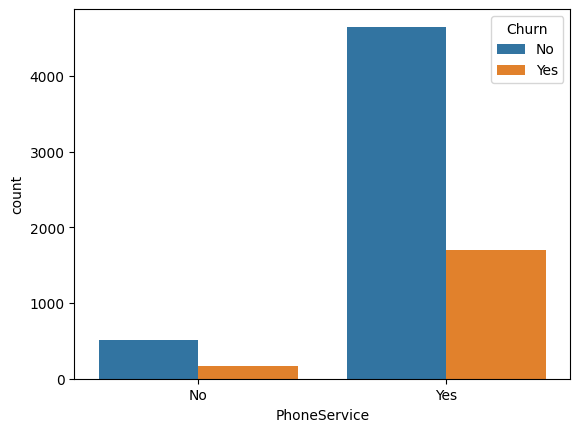

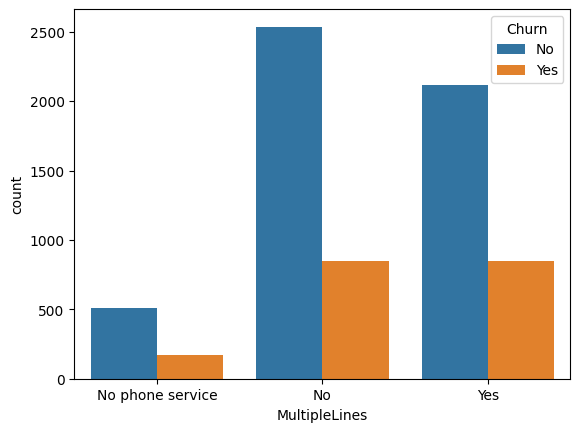

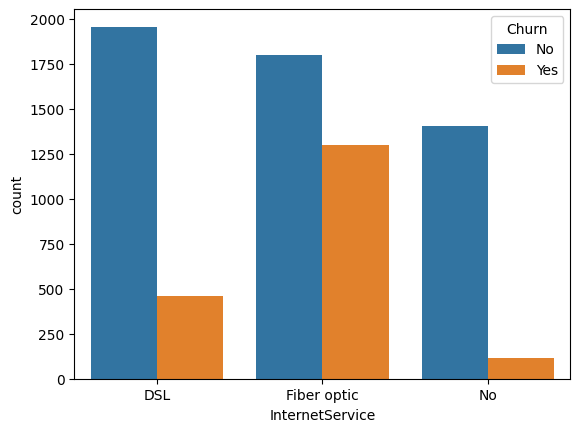

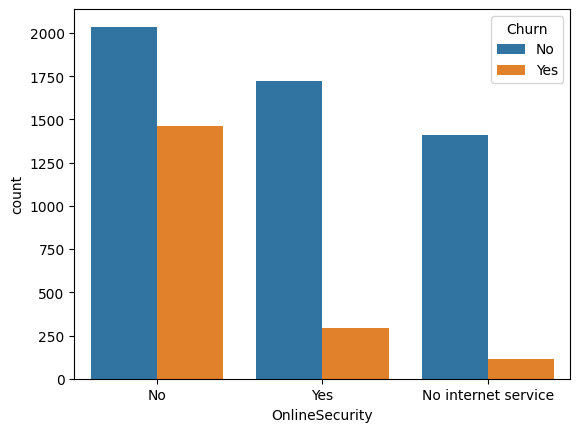

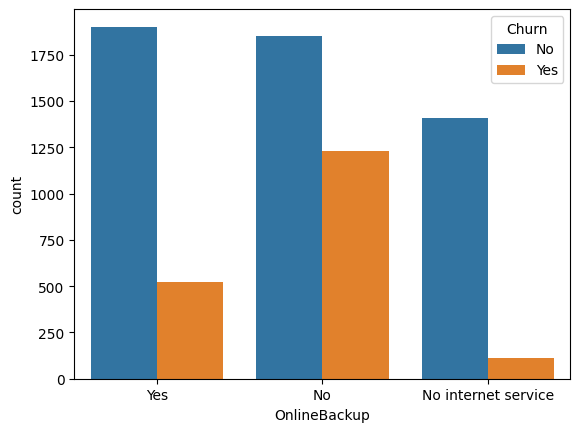

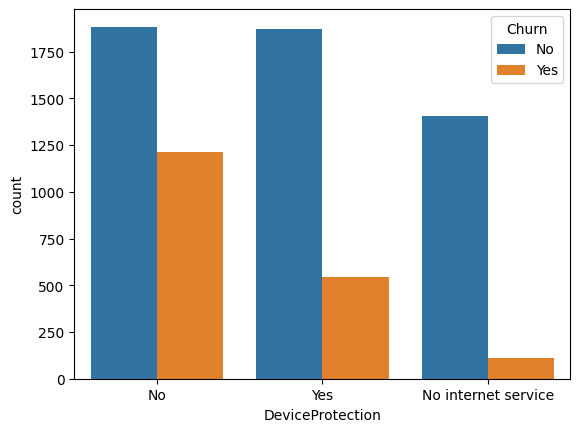

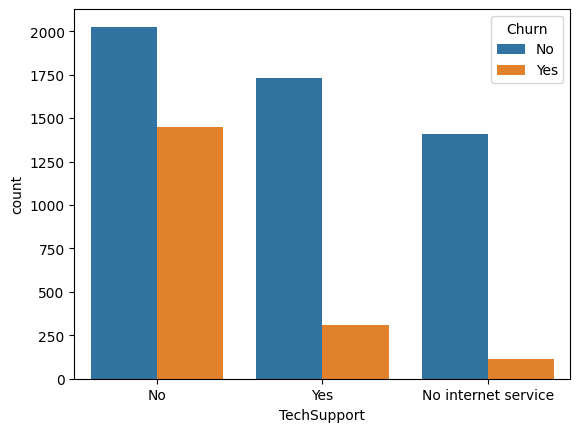

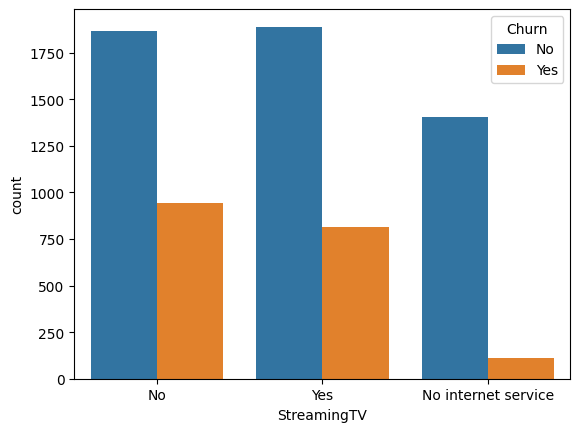

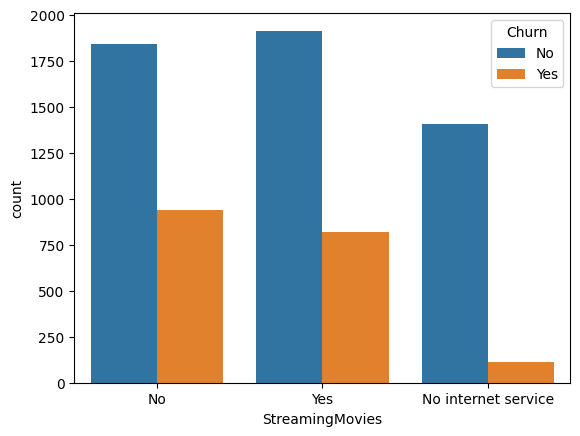

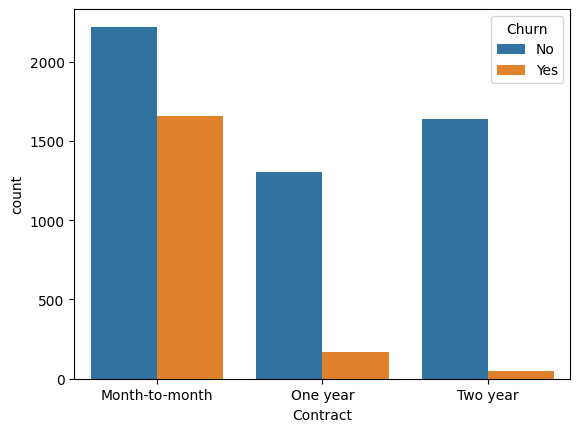

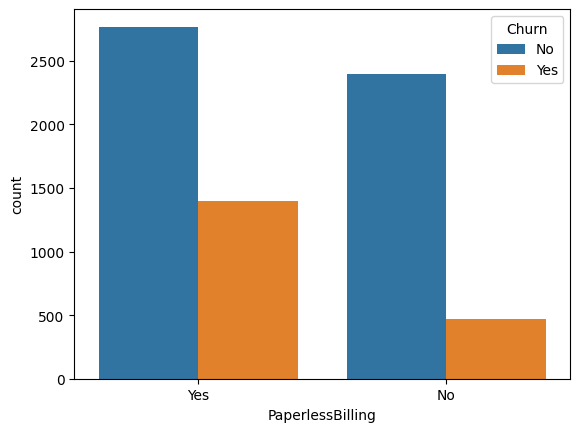

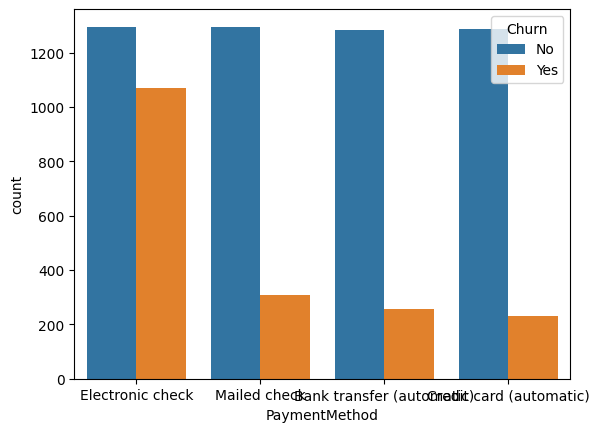

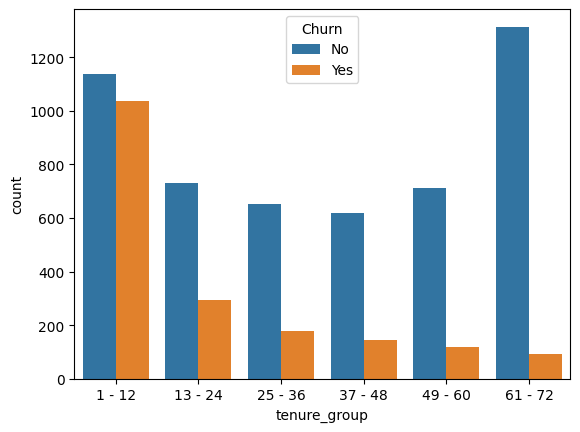

In [20]:
predictors = telco_d.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])
for i, predictor in enumerate(predictors.columns):
    plt.figure(i)
    sns.countplot(data=telco_d, x=predictor, hue='Churn')


In [21]:
#Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0
telco_d['Churn'] = np.where(telco_d.Churn == 'Yes',1,0)
telco_d.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [22]:
# Convert all the categorical variables into dummy variables
telco_data_dummies = pd.get_dummies(telco_d)
telco_data_dummies.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


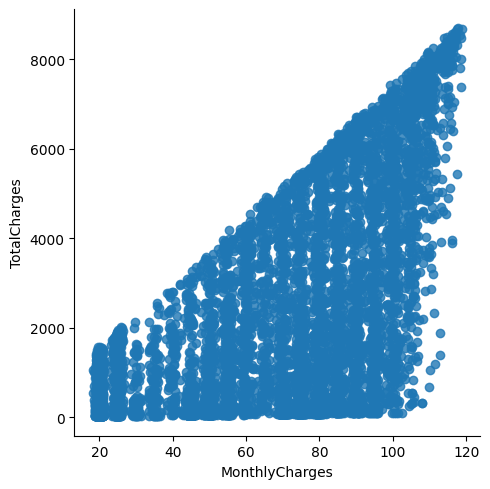

In [23]:
#trend between monthly charges and total charges
sns.lmplot(data=telco_data_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)



*   Total charges and monthly charges as positively correlated.



<ipython-input-24-33a1fb6379c8>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(churn_no, color="red", shade=True, label="No Churn")
<ipython-input-24-33a1fb6379c8>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(churn_yes, color="blue", shade=True, label="Churn")


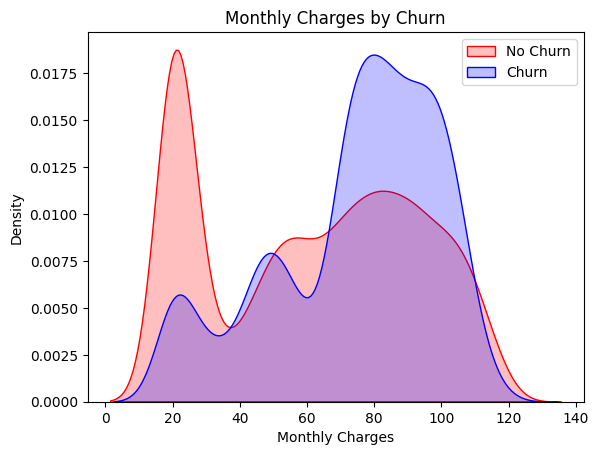

In [24]:
#Trend in churning w.r.t monthly charges.

churn_no = telco_data_dummies.MonthlyCharges[telco_data_dummies["Churn"] == 0]
churn_yes = telco_data_dummies.MonthlyCharges[telco_data_dummies["Churn"] == 1]

sns.kdeplot(churn_no, color="red", shade=True, label="No Churn")
sns.kdeplot(churn_yes, color="blue", shade=True, label="Churn")
plt.xlabel("Monthly Charges")
plt.ylabel("Density")
plt.title("Monthly Charges by Churn")
plt.legend(loc='upper right')
plt.show()



*   Customers are likely to churn when monthly charges are high.



<ipython-input-25-4d29d0b87af0>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(churn_no, color="red", shade=True, label="No Churn")
<ipython-input-25-4d29d0b87af0>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(churn_yes, color="blue", shade=True, label="Churn")


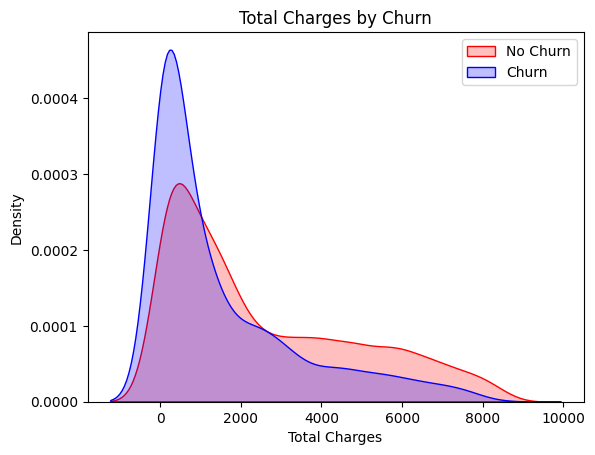

In [25]:
#Trend in churning w.r.t total charges.

churn_no = telco_data_dummies.TotalCharges[telco_data_dummies["Churn"] == 0]
churn_yes = telco_data_dummies.TotalCharges[telco_data_dummies["Churn"] == 1]

sns.kdeplot(churn_no, color="red", shade=True, label="No Churn")
sns.kdeplot(churn_yes, color="blue", shade=True, label="Churn")
plt.xlabel("Total Charges")
plt.ylabel("Density")
plt.title("Total Charges by Churn")
plt.legend(loc='upper right')
plt.show()


* Churn is higher at lower Total Charges

Nonetheless, the combined insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges reveals that higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz Higher Monthly Charge, Lower tenure and Lower Total Charge are related to High Churn




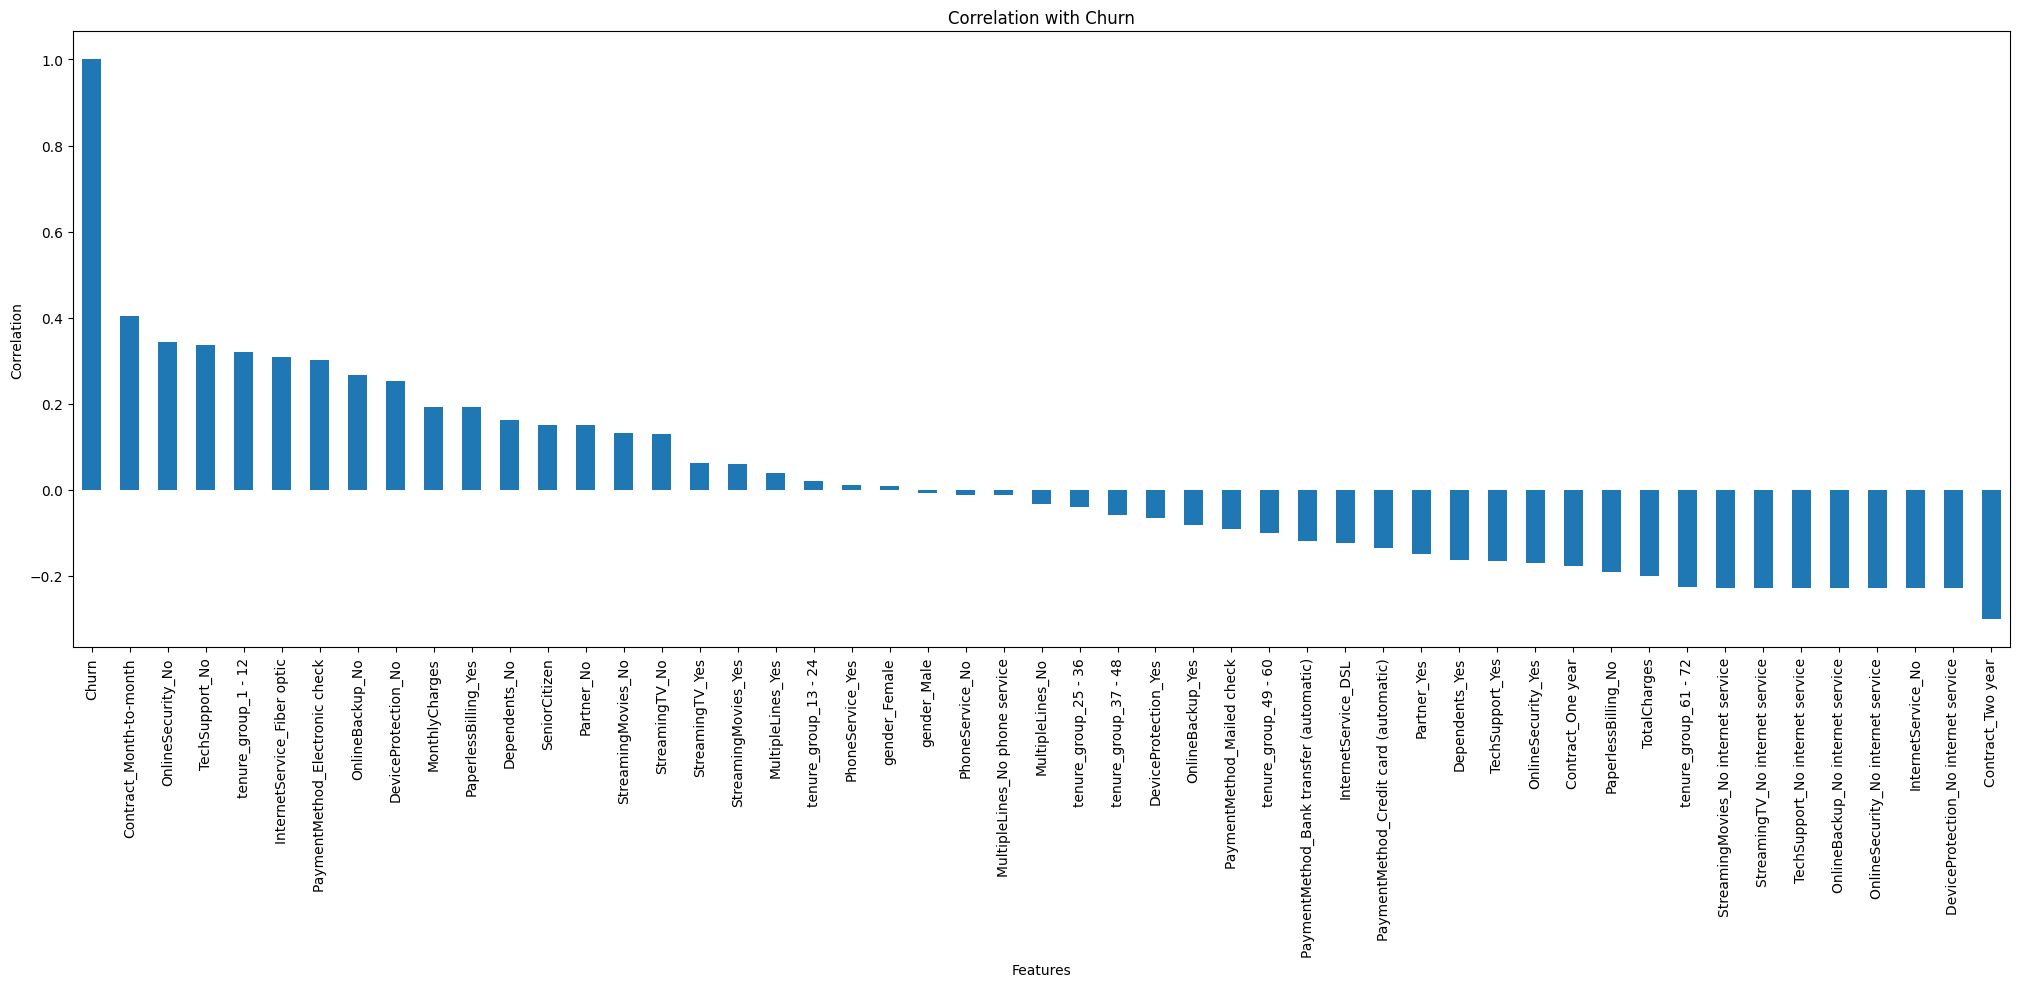

In [26]:
#Correlation of all predictors with 'churn'.
fig, ax = plt.subplots(figsize=(25,8))
telco_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar', ax=ax)
ax.set_title("Correlation with Churn")
ax.set_ylabel("Correlation")
ax.set_xlabel("Features")
plt.show()




*   **Long term contracts, subscriptions without internet service** and the **customers engaged for 5+ years** are having low churn.
*   **Month to month contracts, No online seurity, No tech support, First year of subscription and Fibre Optics Internet** are cases of high churn.
*   Factors such as **Gender, Availability of PhoneService** and **number of multiple lines** has negligiable impact on churn.





<Axes: >

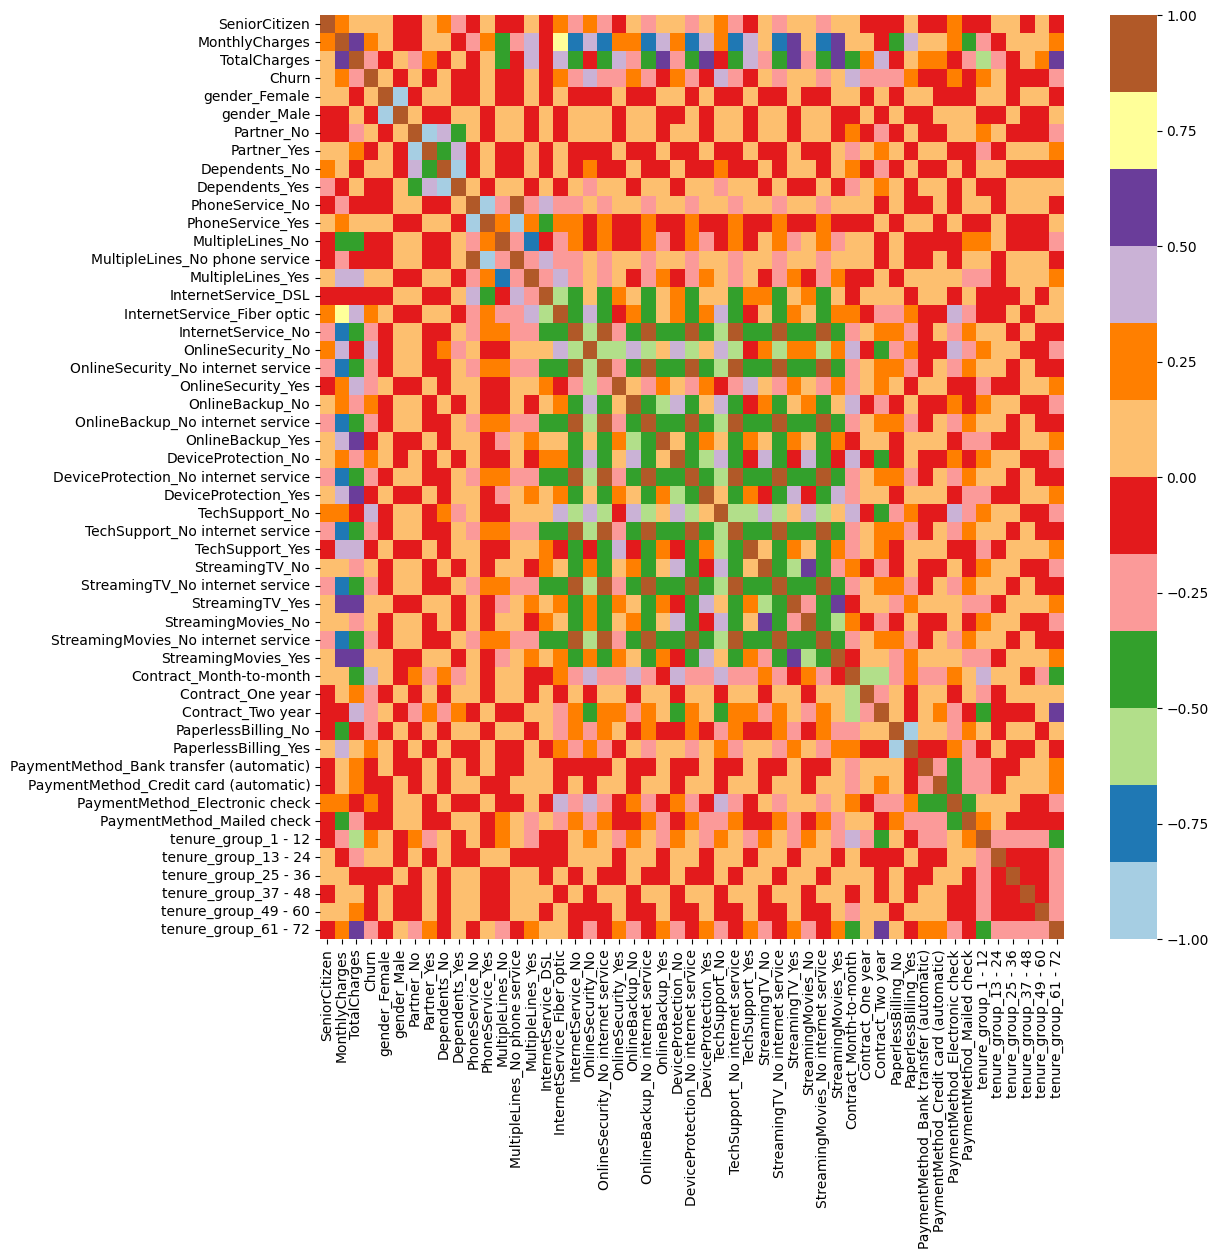

In [27]:
plt.figure(figsize=(12,12))
sns.heatmap(telco_data_dummies.corr(), cmap="Paired")

## Bivariate Analysis

In [38]:
def uniplot(df, col, title, hue=None):
    sns.set_style('whitegrid')
    sns.set_context('talk')
    sns.set_palette('bright')
    plt.rcParams.update({
        "axes.labelsize": 20,
        "axes.titlesize": 22,
        "axes.titlepad": 30
    })

    fig, ax = plt.subplots(figsize=(8, 4))
    ax = sns.countplot(
        data=df,
        x=col,
        order=df[col].value_counts().index,
        hue=hue,
        ax=ax
    )
    ax.set(title=title)
    ax.tick_params(axis='x', rotation=45)

    if hue is not None:
        n_unique_hue = len(df[hue].unique())
        fig.set_size_inches((n_unique_hue * 3) + 10, 8)
        ax.legend(loc='upper right')

    plt.show()


In [32]:
#segregate churner and non-churner dataframe
new_df_nonchurner = telco_d.loc[telco_d['Churn'] == 0]
new_df_churner = telco_d.loc[telco_d['Churn'] == 1]

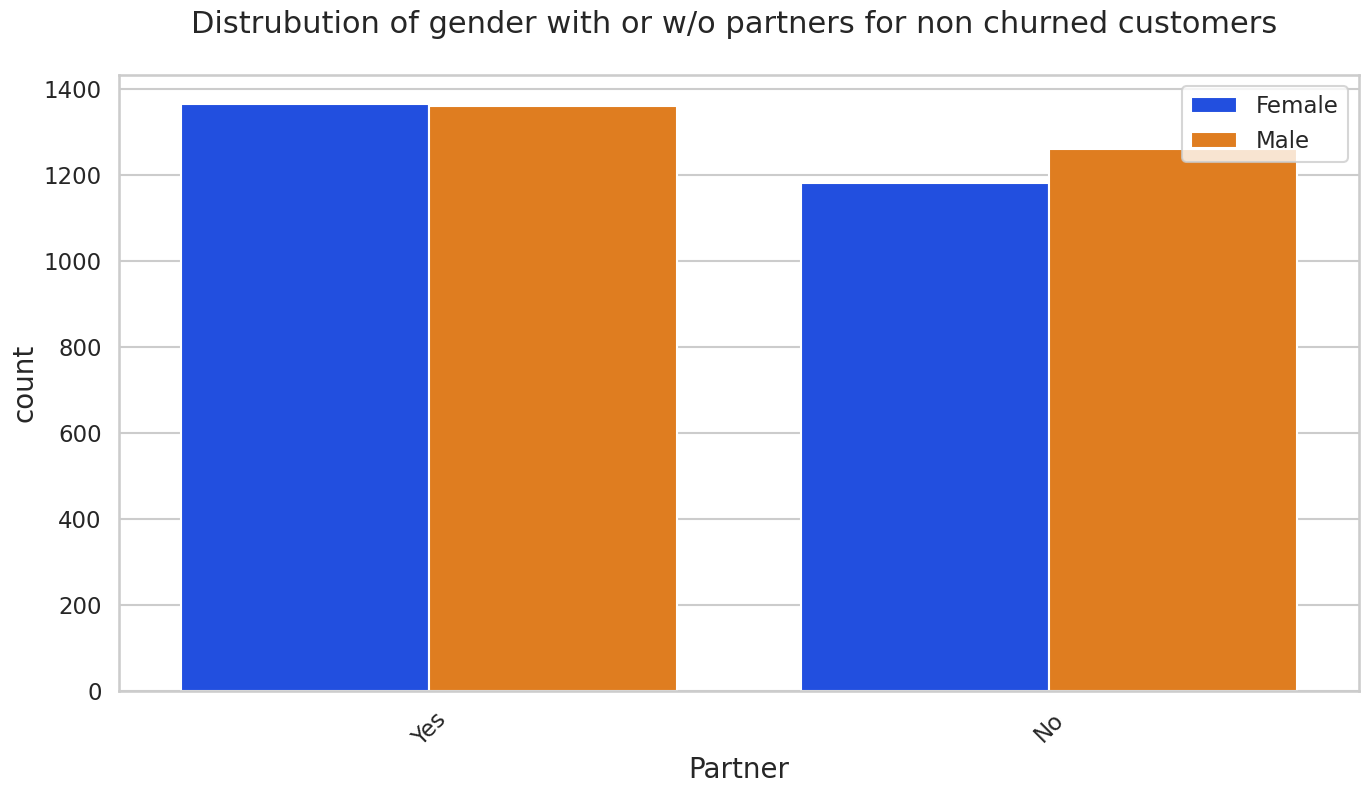

In [39]:
 uniplot(new_df_nonchurner, col='Partner',title = 'Distrubution of gender with or w/o partners for non churned customers ', hue= 'gender')

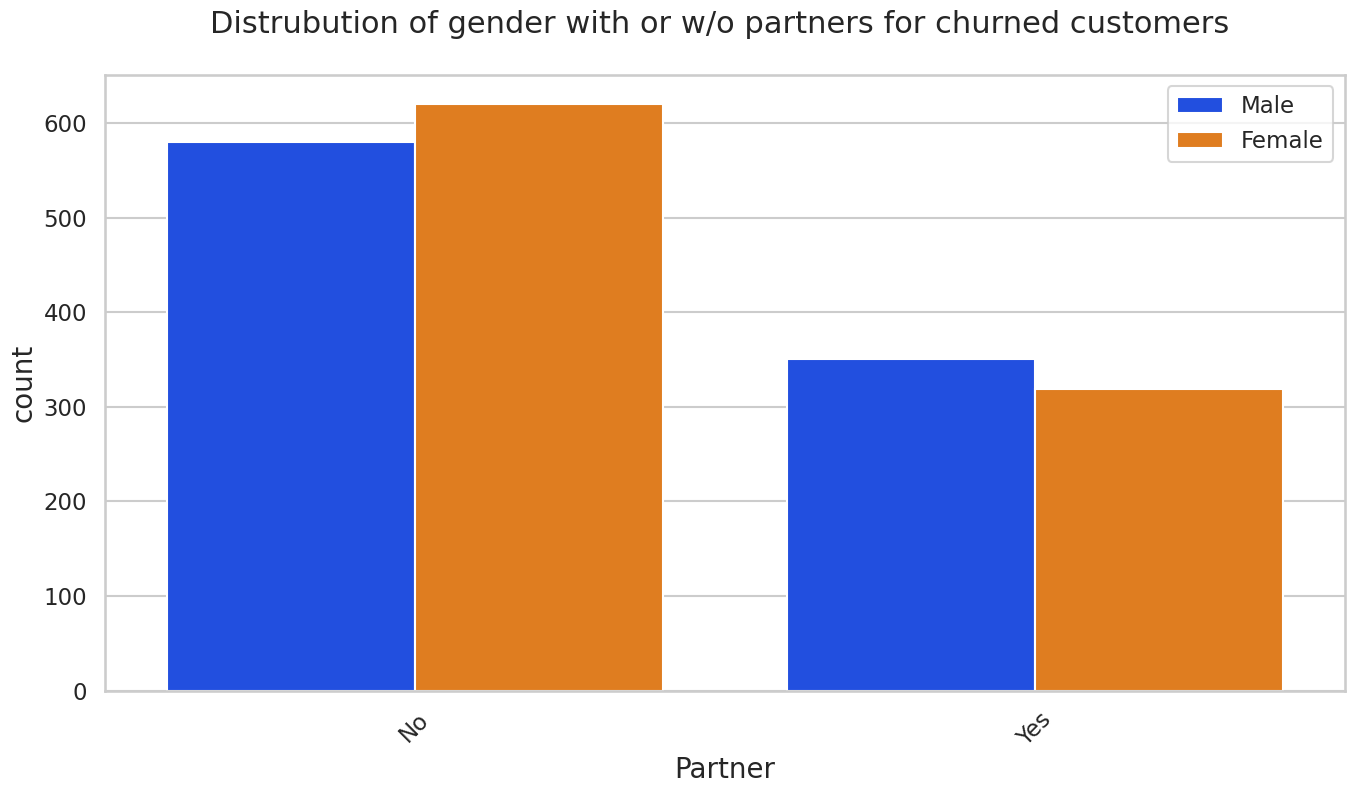

In [41]:
 uniplot(new_df_churner, col='Partner',title = 'Distrubution of gender with or w/o partners for churned customers ', hue= 'gender')

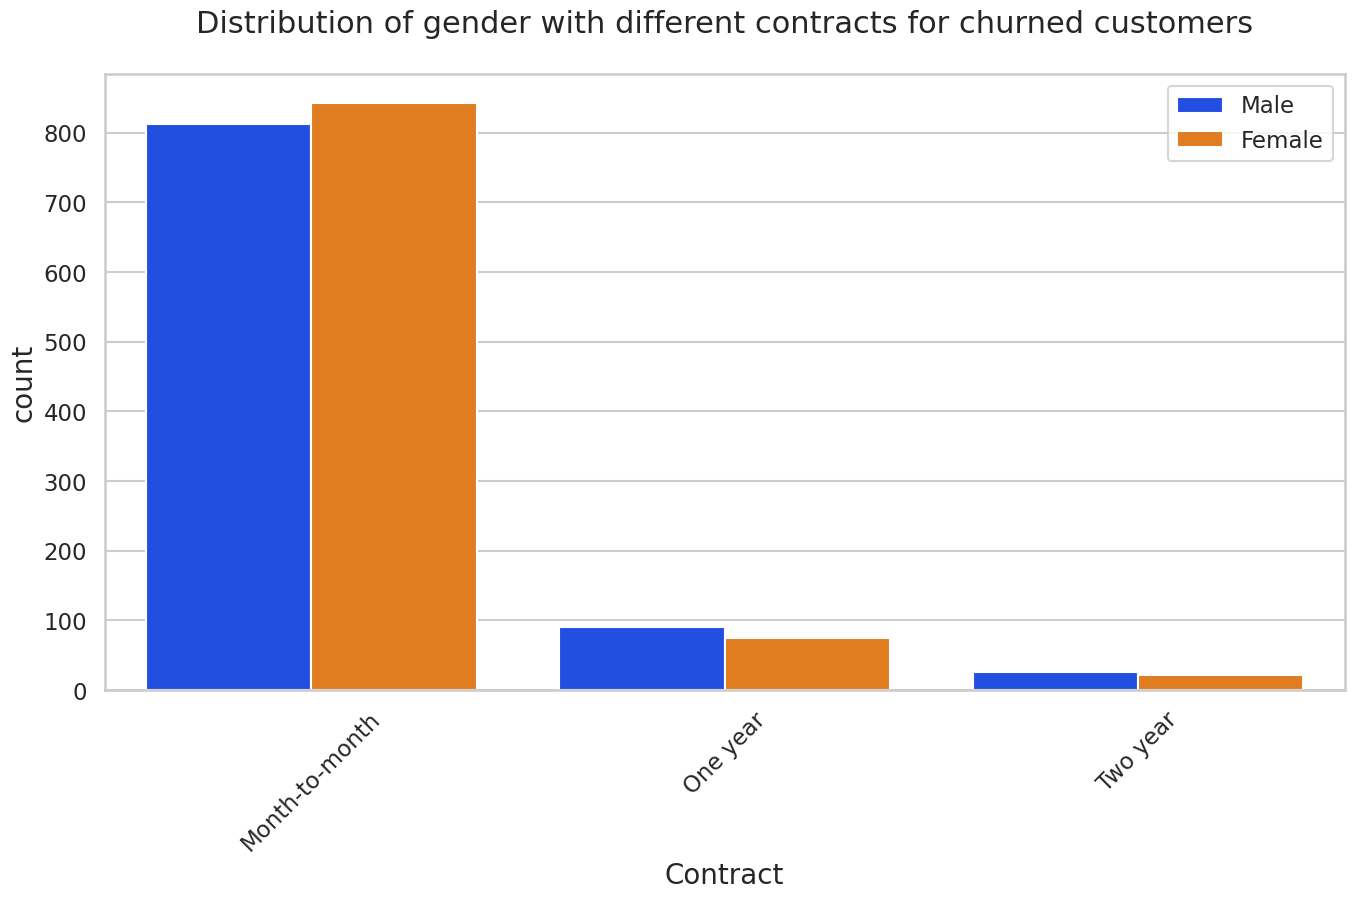

In [43]:
uniplot(new_df_churner,col='Contract', title = 'Distribution of gender with different contracts for churned customers', hue = 'gender')

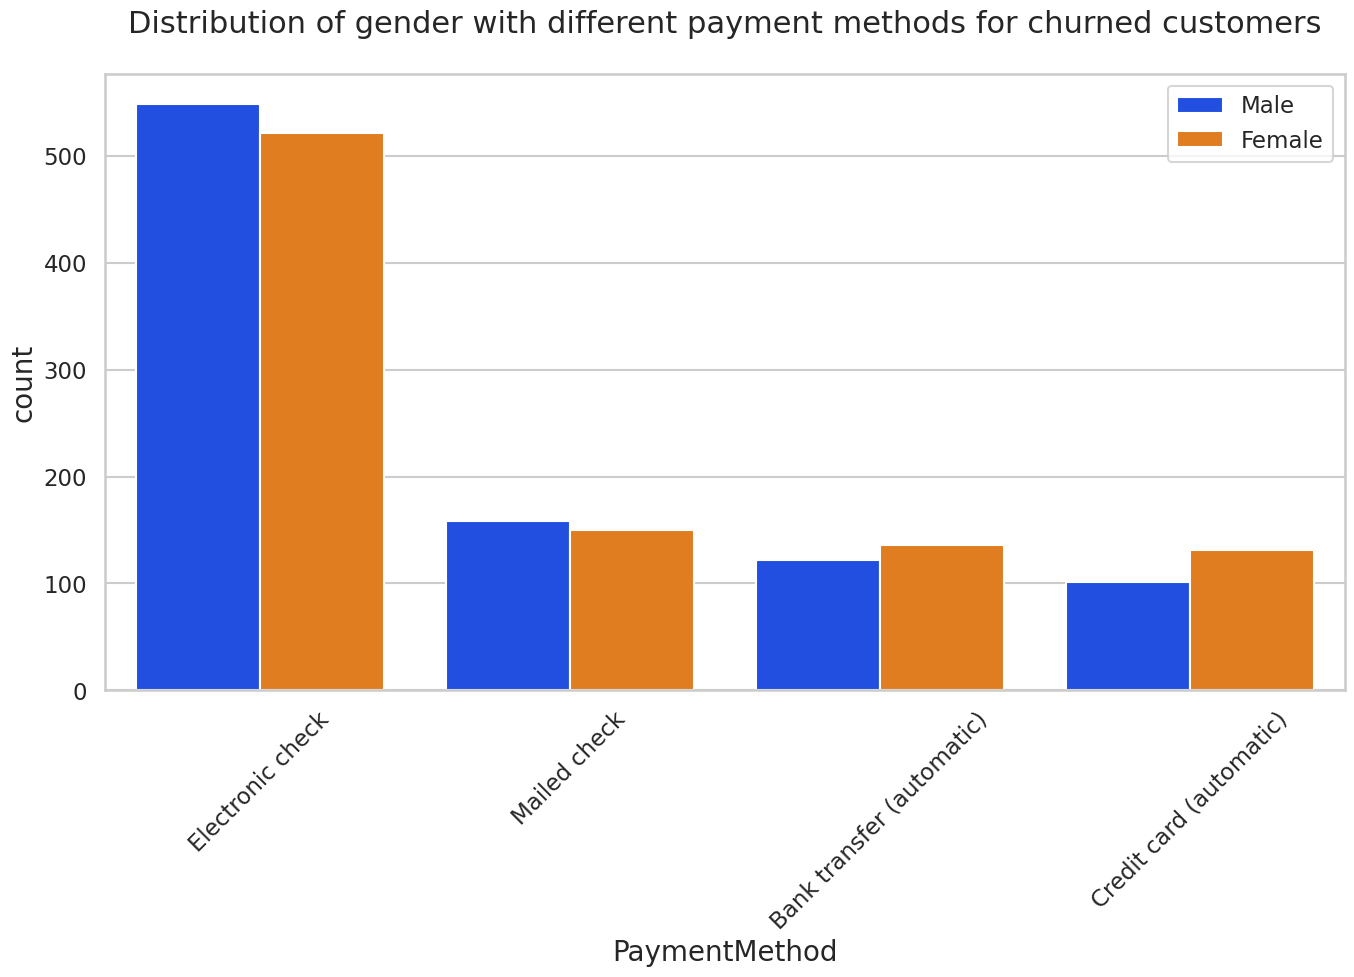

In [44]:
uniplot(new_df_churner,col='PaymentMethod', title = 'Distribution of gender with different payment methods for churned customers', hue = 'gender')

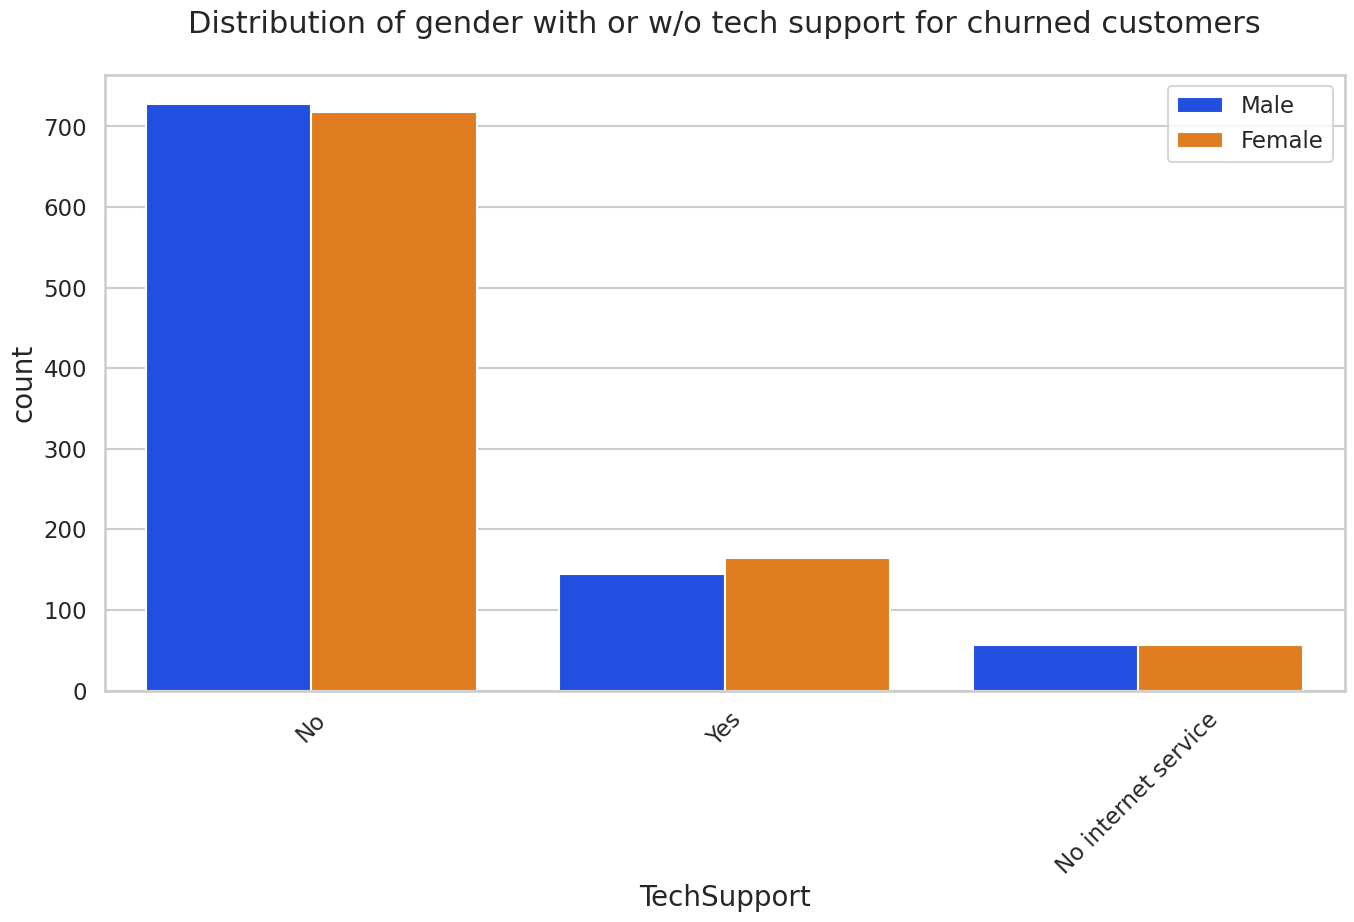

In [45]:
uniplot(new_df_churner,col='TechSupport', title = 'Distribution of gender with or w/o tech support for churned customers', hue = 'gender')

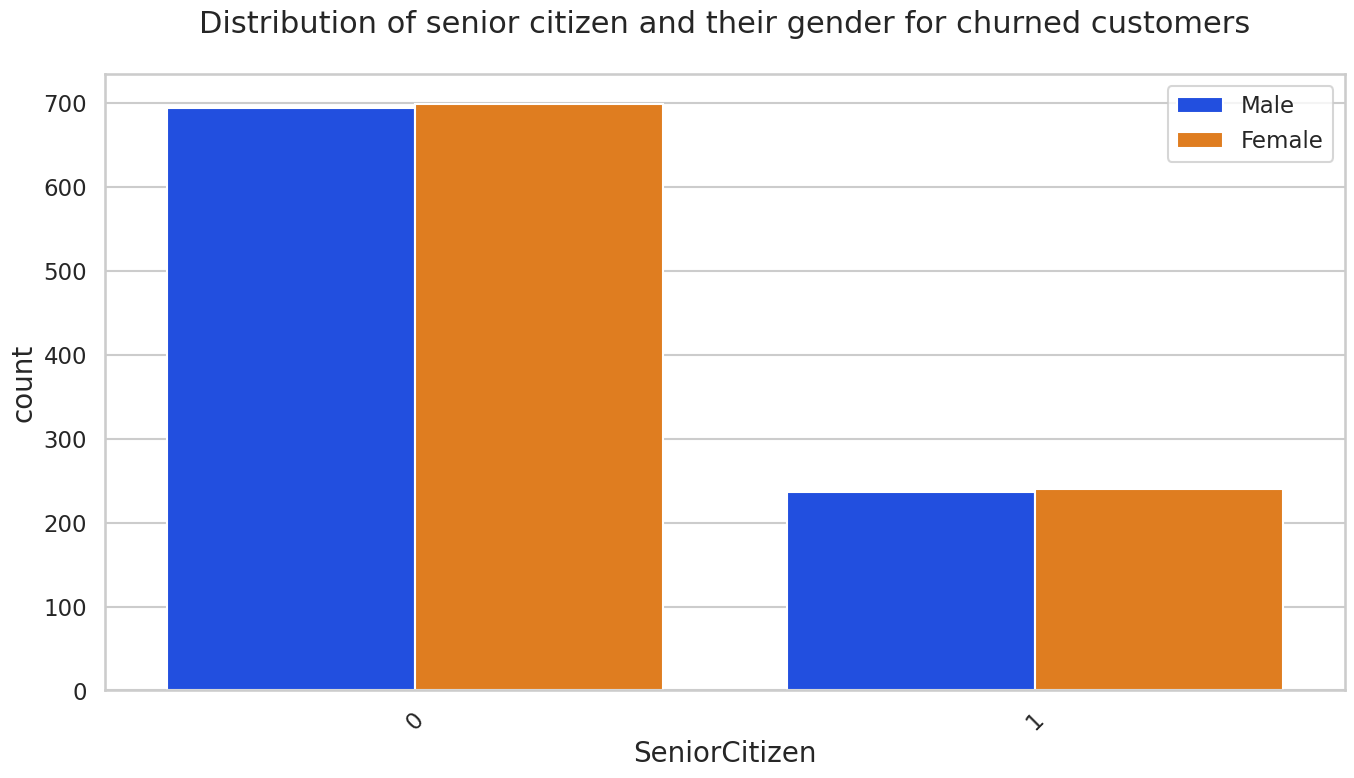

In [46]:
uniplot(new_df_churner,col='SeniorCitizen', title = 'Distribution of senior citizen and their gender for churned customers', hue = 'gender')

These are some of the quick insights from this exercise:

1. Electronic check medium are the highest churners
2. Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.
3. No Online security, No Tech Support category are high churners
4. Non senior Citizens are high churners